In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [2]:
f = np.load('../data.npz')
_x = f['feature']
_y = f['lsi']

In [3]:
print(_x.shape, _y.shape)

(101, 1000, 40) (101, 1000, 1)


In [320]:
x = _x.reshape(-1, 40)
y = _y.flatten()

In [321]:
scaler = StandardScaler()
data = np.concatenate((x, y.reshape(-1,1)), axis=1)
scaler.fit(data)
data_norm = scaler.transform(data)
x_norm = data_norm[:,:-1]
y_norm = data_norm[:,-1]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm[:,0:4*n], y_norm, test_size=.2)
regr = SVR()
regr.fit(x_train, y_train)
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

xx = np.linspace(np.min(y_train), np.max(y_train), 1000)
ax[0].plot(xx, xx)
ax[0].scatter(y_train, y_train_pred, s=5, alpha=.5, c='red')

xx = np.linspace(np.min(y_test), np.max(y_test), 1000)
ax[1].plot(xx, xx)
ax[1].scatter(y_test, y_test_pred, s=5, alpha=.5, c='red')

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

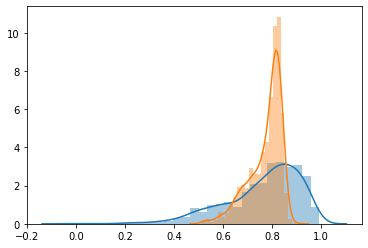

In [209]:
sns.distplot(y_test)
sns.distplot(y_test_pred)

In [32]:
f = np.load('../test.npz', allow_pickle=True)

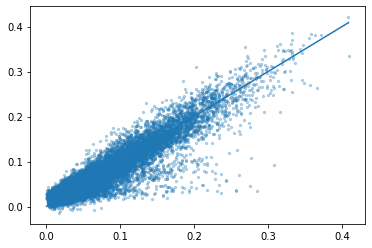

In [33]:
y = f['pred']
xx = np.linspace(y[:,0].min(), y[:,0].max(), 100)
plt.plot(xx, xx)
plt.scatter(y[:,0], y[:,1], s=5, alpha=.3)

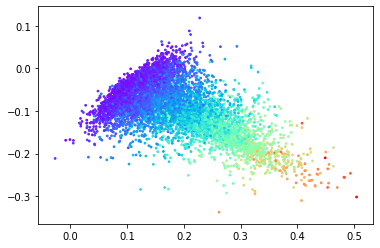

In [34]:
x = f['encode']
plt.scatter(x[:,0], x[:,1], c=y[:,0], s=3, alpha=5, cmap=plt.cm.rainbow)

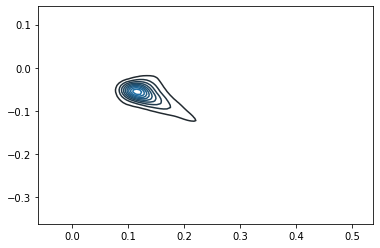

In [35]:
sns.kdeplot(x[:,0], x[:,1])

In [ ]:
n_vec = np.linspace(1, 50, 50).astype(int)

mse_list = []
for i, n in enumerate(n_vec):
    x_train, x_test, y_train, y_test = train_test_split(x_norm[:,0:4*n], y_norm, test_size=.2)
    regr = SVR()
    regr.fit(x_train, y_train)
    y_train_pred = regr.predict(x_train)
    y_test_pred = regr.predict(x_test)
    mse_list.append(mean_squared_error(y_test, y_test_pred))